In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rf_data = pd.read_csv('model_performance/reduced_features_rf_gridsearch_cv.csv')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010287,0.004001,0.002004,0.000910,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.879121,0.912088,0.934066,0.934066,0.956044,0.923077,0.026005,21
1,0.018246,0.003206,0.002607,0.000503,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.846154,0.934066,0.934066,0.956044,0.956044,0.925275,0.040763,20
2,0.025354,0.002472,0.001888,0.000480,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.890110,0.923077,0.956044,0.956044,0.967033,0.938462,0.028317,2
3,0.103765,0.064520,0.006095,0.002649,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.879121,0.923077,0.956044,0.956044,0.967033,0.936264,0.032151,3
4,0.112166,0.009436,0.004768,0.001136,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.879121,0.934066,0.967033,0.956044,0.967033,0.940659,0.033040,1


In [3]:
rf_data['param_max_depth'] = rf_data['param_max_depth'].fillna('None')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010287,0.004001,0.002004,0.000910,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.879121,0.912088,0.934066,0.934066,0.956044,0.923077,0.026005,21
1,0.018246,0.003206,0.002607,0.000503,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.846154,0.934066,0.934066,0.956044,0.956044,0.925275,0.040763,20
2,0.025354,0.002472,0.001888,0.000480,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.890110,0.923077,0.956044,0.956044,0.967033,0.938462,0.028317,2
3,0.103765,0.064520,0.006095,0.002649,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.879121,0.923077,0.956044,0.956044,0.967033,0.936264,0.032151,3
4,0.112166,0.009436,0.004768,0.001136,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.879121,0.934066,0.967033,0.956044,0.967033,0.940659,0.033040,1


In [4]:
top_score_row = rf_data[rf_data['mean_test_score'] == rf_data['mean_test_score'].max()][['param_n_estimators', 'mean_fit_time', 'mean_test_score', 'param_max_depth']].values.tolist()
top_rf_n_estimators = top_score_row[0][0]
top_rf_mean_fit_time = top_score_row[0][1]
top_rf_mean_fit_time = float("%.5f" % top_rf_mean_fit_time)
top_rf_mean_test_score = top_score_row[0][2]
top_rf_mean_test_score = float("%.5f" % top_rf_mean_test_score)
top_rf_depth = top_score_row[0][3]
top_rf_n_estimators, top_rf_mean_fit_time, top_rf_mean_test_score, top_rf_depth

(100, 0.11217, 0.94066, 5.0)

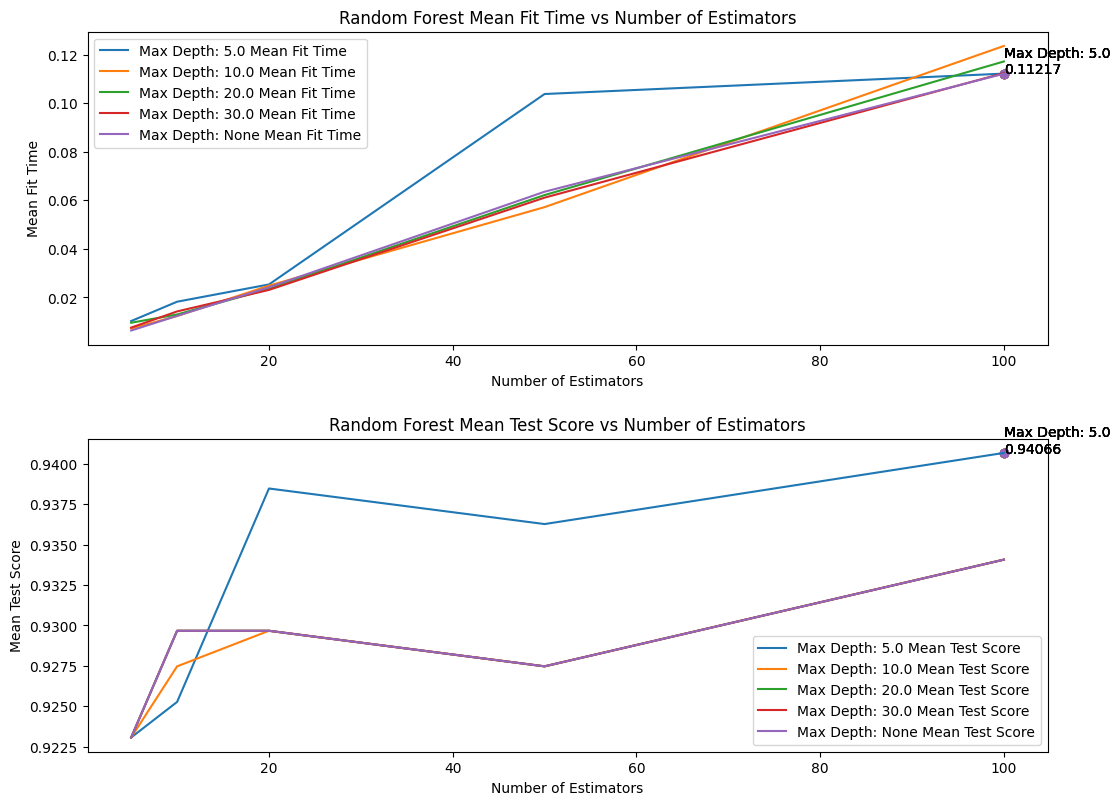

In [5]:
plt.figure(figsize=(12, 9))
depths = rf_data['param_max_depth'].fillna('None').unique()

for depth in depths:
    plt.subplot(2, 1, 1)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
            rf_data[rf_data['param_max_depth']==depth]['mean_fit_time'], label=f'Max Depth: {depth} Mean Fit Time')
    plt.title('Random Forest Mean Fit Time vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_rf_n_estimators, top_rf_mean_fit_time)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_fit_time}',
                 xy=(top_rf_n_estimators, top_rf_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
             rf_data[rf_data['param_max_depth']==depth]['mean_test_score'], label=f'Max Depth: {depth} Mean Test Score')
    plt.title('Random Forest Mean Test Score vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_rf_n_estimators, top_rf_mean_test_score)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_test_score}',
                 xy=(top_rf_n_estimators, top_rf_mean_test_score))
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/reduced_features_rf_gridsearch_cv.png')

In [6]:
lr_data = pd.read_csv('model_performance/reduced_features_lr_gridsearch_cv.csv')
lr_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006371,0.001242,0.001937,0.001106,0.0001,NaN,"{'C': 0.0001, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
1,0.003349,0.001353,0.001594,0.000488,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
2,0.004630,0.000411,0.001005,0.000644,0.0010,NaN,"{'C': 0.001, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
3,0.002069,0.000613,0.001208,0.000428,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
4,0.004393,0.000499,0.000790,0.000396,0.0100,NaN,"{'C': 0.01, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1


In [7]:
lr_data['param_penalty'] = lr_data['param_penalty'].fillna('None')
lr_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006371,0.001242,0.001937,0.001106,0.0001,None,"{'C': 0.0001, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
1,0.003349,0.001353,0.001594,0.000488,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
2,0.004630,0.000411,0.001005,0.000644,0.0010,None,"{'C': 0.001, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
3,0.002069,0.000613,0.001208,0.000428,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
4,0.004393,0.000499,0.000790,0.000396,0.0100,None,"{'C': 0.01, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
5,0.001602,0.000496,0.000988,0.000016,0.0100,l2,"{'C': 0.01, 'penalty': 'l2'}",0.637363,0.648352,0.637363,0.637363,0.637363,0.639560,0.004396,12
6,0.004391,0.000783,0.001186,0.000413,0.1000,None,"{'C': 0.1, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
7,0.001778,0.000745,0.000813,0.000408,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.890110,0.923077,0.945055,0.868132,0.879121,0.901099,0.028656,11
8,0.004981,0.000606,0.000798,0.000399,1.0000,None,"{'C': 1, 'penalty': None}",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
9,0.002363,0.000484,0.001027,0.000042,1.0000,l2,"{'C': 1, 'penalty': 'l2'}",0.912088,0.912088,0.967033,0.923077,0.956044,0.934066,0.023051,10


In [8]:
top_lr_score_row = lr_data[lr_data['mean_test_score'] == lr_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_penalty']].values.tolist()
top_lr_c = top_lr_score_row[0][0]
top_lr_mean_fit_time = top_lr_score_row[0][1]
top_lr_mean_fit_time = float("%.5f" % top_lr_mean_fit_time)
top_lr_mean_test_score = top_lr_score_row[0][2]
top_lr_mean_test_score = float("%.5f" % top_lr_mean_test_score)
top_lr_penalty = top_lr_score_row[0][3]
top_lr_c, top_lr_mean_fit_time, top_lr_mean_test_score, top_lr_penalty

(0.0001, 0.00637, 0.95604, 'None')

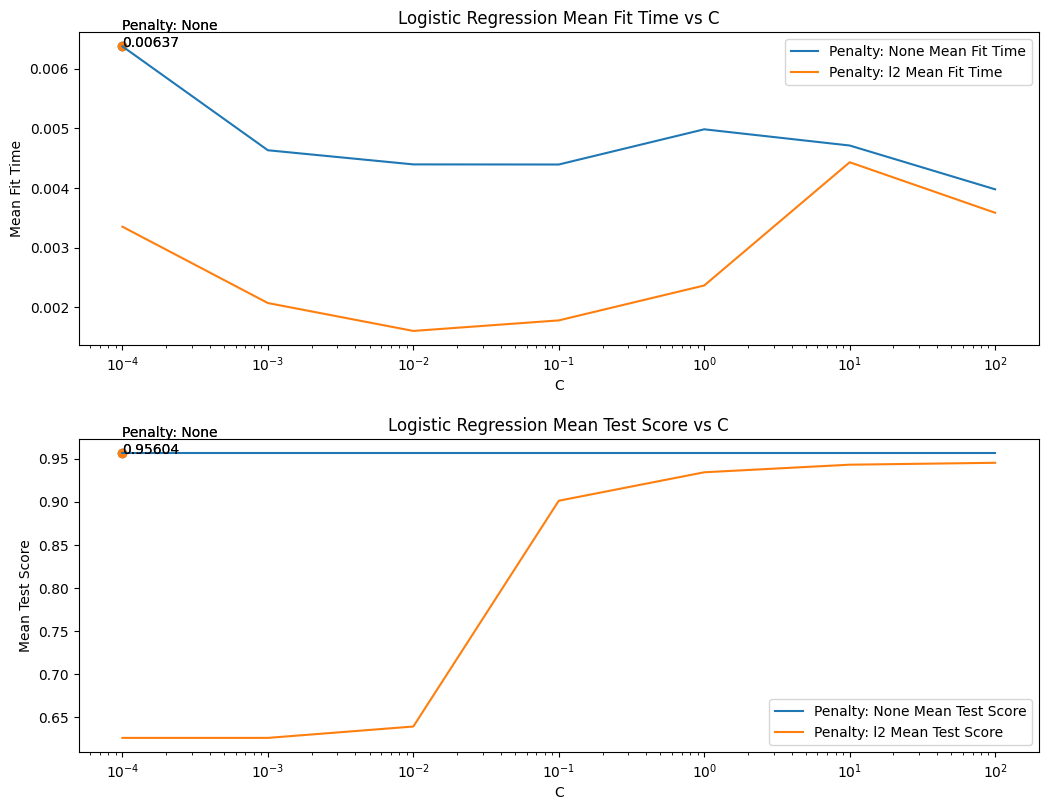

In [9]:
plt.figure(figsize=(12, 9))
penalties = lr_data['param_penalty'].unique()

for penalty in penalties:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
            lr_data[lr_data['param_penalty']==penalty]['mean_fit_time'], label=f'Penalty: {penalty} Mean Fit Time')
    plt.title('Logistic Regression Mean Fit Time vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_lr_c, top_lr_mean_fit_time)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_fit_time}', xy=(top_lr_c, top_lr_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
             lr_data[lr_data['param_penalty']==penalty]['mean_test_score'], label=f'Penalty: {penalty} Mean Test Score')
    plt.title('Logistic Regression Mean Test Score vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_lr_c, top_lr_mean_test_score)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_test_score}', xy=(top_lr_c, top_lr_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/reduced_features_lr_performance.png')

In [10]:
svm_data = pd.read_csv('model_performance/reduced_features_svm_gridsearch_cv.csv')
svm_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004144,0.000946,0.001825,0.000417,0.1,2,linear,"{'C': 0.1, 'degree': 2, 'kernel': 'linear'}",0.934066,0.934066,0.956044,0.923077,0.934066,0.936264,0.010767,14
1,0.003060,0.000897,0.001975,0.000218,0.1,2,poly,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.912088,0.912088,0.967033,0.923077,0.956044,0.934066,0.023051,20
2,0.002664,0.000599,0.002387,0.000795,0.1,2,rbf,"{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}",0.923077,0.912088,0.978022,0.923077,0.967033,0.940659,0.026556,1
3,0.004585,0.000787,0.002258,0.000454,0.1,2,sigmoid,"{'C': 0.1, 'degree': 2, 'kernel': 'sigmoid'}",0.582418,0.571429,0.428571,0.395604,0.461538,0.487912,0.075689,46
4,0.002056,0.000145,0.001454,0.000541,0.1,3,linear,"{'C': 0.1, 'degree': 3, 'kernel': 'linear'}",0.934066,0.934066,0.956044,0.923077,0.934066,0.936264,0.010767,14


In [11]:
top_svm_score_row = svm_data[svm_data['mean_test_score'] == svm_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_kernel', 'param_degree']].values.tolist()
top_svm_c = top_svm_score_row[0][0]
top_svm_mean_fit_time = top_svm_score_row[0][1]
top_svm_mean_fit_time = float("%.5f" % top_svm_mean_fit_time)
top_svm_mean_test_score = top_svm_score_row[0][2]
top_svm_mean_test_score = float("%.5f" % top_svm_mean_test_score)
top_svm_kernel = top_svm_score_row[0][3]
top_svm_degree = top_svm_score_row[0][4]
top_svm_c, top_svm_mean_fit_time, top_svm_mean_test_score, top_svm_kernel, top_svm_degree

(0.1, 0.00266, 0.94066, 'rbf', 2)

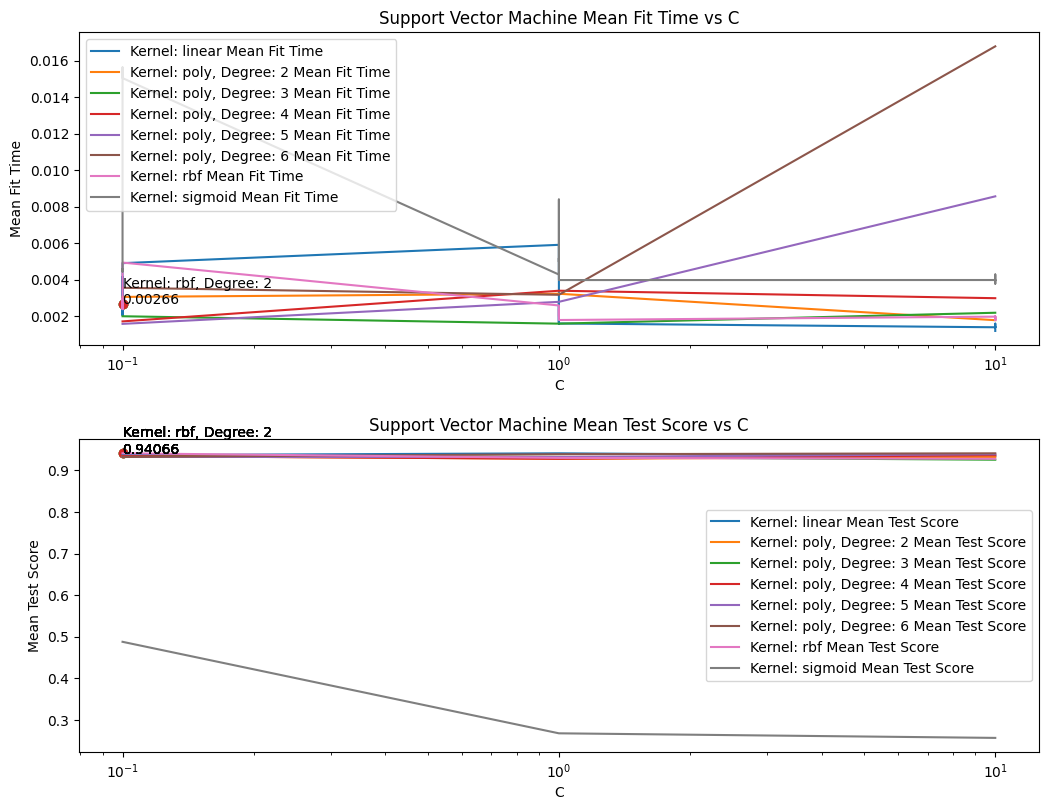

In [12]:
plt.figure(figsize=(12, 9))
kernels = svm_data['param_kernel'].unique()
degrees = svm_data['param_degree'].unique()
for kernel in kernels:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_fit_time'],
                     label=f'Kernel: {kernel}, Degree: {degree} Mean Fit Time')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_fit_time}',
                     xy=(top_svm_c, top_svm_mean_fit_time))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_fit_time'],
                 label=f'Kernel: {kernel} Mean Fit Time')
        plt.title('Support Vector Machine Mean Fit Time vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_fit_time)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_test_score'],
                     label=f'Kernel: {kernel}, Degree: {degree} Mean Test Score')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Test Score')
            plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_test_score}',
                         xy=(top_svm_c, top_svm_mean_test_score))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_test_score'],
                 label=f'Kernel: {kernel} Mean Test Score')
        plt.title('Support Vector Machine Mean Test Score vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Test Score')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_test_score)
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/reduced_features_svm_performance.png')

In [13]:
knn_data = pd.read_csv('model_performance/reduced_features_knn_gridsearch_cv.csv')
knn_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001190,2.361758e-04,0.003856,5.266302e-04,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.879121,0.890110,0.956044,0.934066,0.912088,0.914286,0.028146,28
1,0.000397,4.869983e-04,0.001121,2.507225e-04,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.835165,0.923077,0.956044,0.956044,0.945055,0.923077,0.045575,24
2,0.001196,3.977539e-04,0.004585,1.198245e-03,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.912088,0.912088,0.978022,0.945055,0.934066,0.936264,0.024474,6
3,0.000800,4.001628e-04,0.002759,3.580728e-03,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.890110,0.912088,0.978022,0.945055,0.934066,0.931868,0.029812,11
4,0.000996,5.642013e-07,0.003987,4.768372e-07,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.923077,0.945055,0.978022,0.923077,0.912088,0.936264,0.023466,6


In [14]:
top_knn_score_row = knn_data[knn_data['mean_test_score'] == knn_data['mean_test_score'].max()][['param_n_neighbors', 'mean_fit_time', 'mean_test_score', 'param_weights']].values.tolist()
top_knn_n_neighbors = top_knn_score_row[0][0]
top_knn_mean_fit_time = top_knn_score_row[0][1]
top_knn_mean_fit_time = float("%.5f" % top_knn_mean_fit_time)
top_knn_mean_test_score = top_knn_score_row[0][2]
top_knn_mean_test_score = float("%.5f" % top_knn_mean_test_score)
top_knn_weight = top_knn_score_row[0][3]
top_knn_n_neighbors, top_knn_mean_fit_time, top_knn_mean_test_score, top_knn_weight

(5, 0.001, 0.94505, 'uniform')

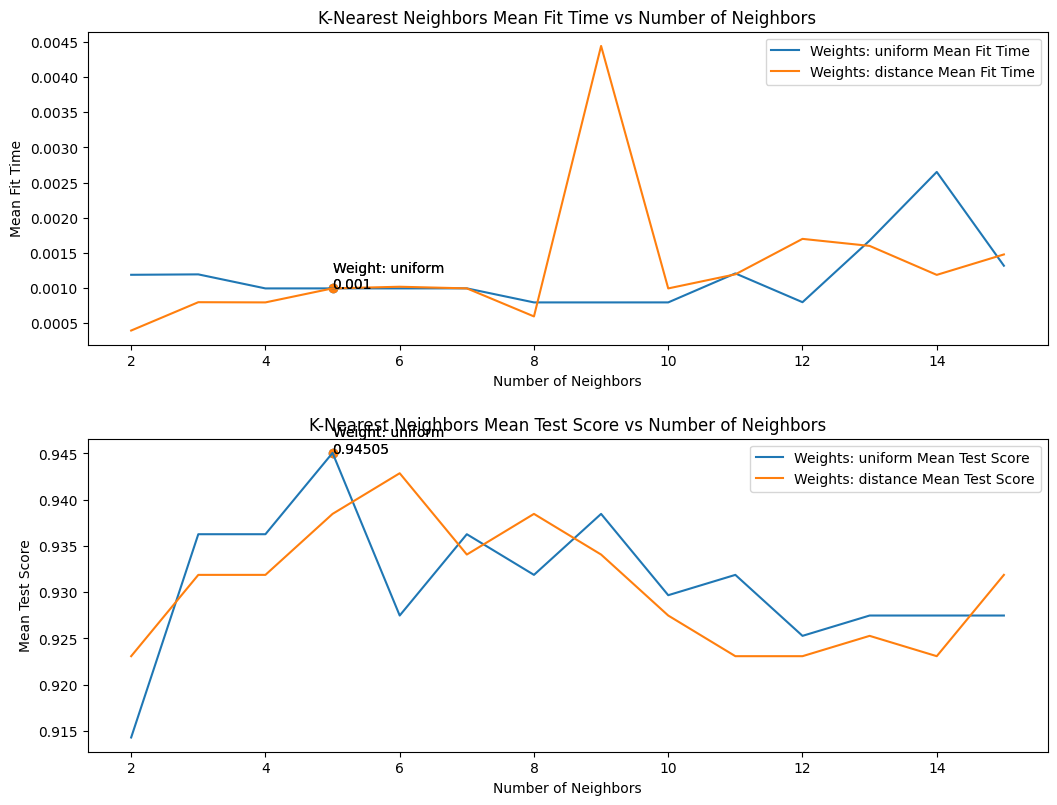

In [15]:
plt.figure(figsize=(12, 9))
weights = knn_data['param_weights'].unique()

for weight in weights:
    plt.subplot(2, 1, 1)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
            knn_data[knn_data['param_weights']==weight]['mean_fit_time'], label=f'Weights: {weight} Mean Fit Time')
    plt.title('K-Nearest Neighbors Mean Fit Time vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_fit_time)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_fit_time}', xy=(top_knn_n_neighbors, top_knn_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
             knn_data[knn_data['param_weights']==weight]['mean_test_score'], label=f'Weights: {weight} Mean Test Score')
    plt.title('K-Nearest Neighbors Mean Test Score vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_test_score)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_test_score}', xy=(top_knn_n_neighbors, top_knn_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/reduced_features_knn_performance.png')

In [16]:
mlp_data = pd.read_csv('model_performance/reduced_features_mlp_gridsearch_cv.csv')
mlp_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013707,0.004461,0.001766,0.000703,identity,10,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
1,0.062514,0.003915,0.001599,0.000490,identity,10,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.868132,0.769231,0.912088,0.857143,0.879121,0.857143,0.047647,36
2,0.072263,0.002255,0.001185,0.000406,identity,10,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.934066,0.912088,0.945055,0.923077,0.956044,0.934066,0.015541,24
3,0.011761,0.001595,0.001195,0.000397,identity,20,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.934066,0.967033,0.978022,0.945055,0.956044,0.956044,0.015541,1
4,0.063832,0.004323,0.001396,0.000487,identity,20,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.890110,0.912088,0.923077,0.824176,0.890110,0.887912,0.034331,33


In [17]:
top_mlp_score_row = mlp_data[mlp_data['mean_test_score'] == mlp_data['mean_test_score'].max()][['param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score', 'param_activation', 'param_solver']].values.tolist()
top_mlp_layer_size = top_mlp_score_row[0][0]
top_mlp_mean_fit_time = top_mlp_score_row[0][1]
top_mlp_mean_fit_time = float("%.5f" % top_mlp_mean_fit_time)
top_mlp_mean_test_score = top_mlp_score_row[0][2]
top_mlp_mean_test_score = float("%.5f" % top_mlp_mean_test_score)
top_mlp_activation = top_mlp_score_row[0][3]
top_mlp_solver = top_mlp_score_row[0][4]
top_mlp_layer_size, top_mlp_mean_fit_time, top_mlp_mean_test_score, top_mlp_activation, top_mlp_solver

(10, 0.01371, 0.95604, 'identity', 'lbfgs')

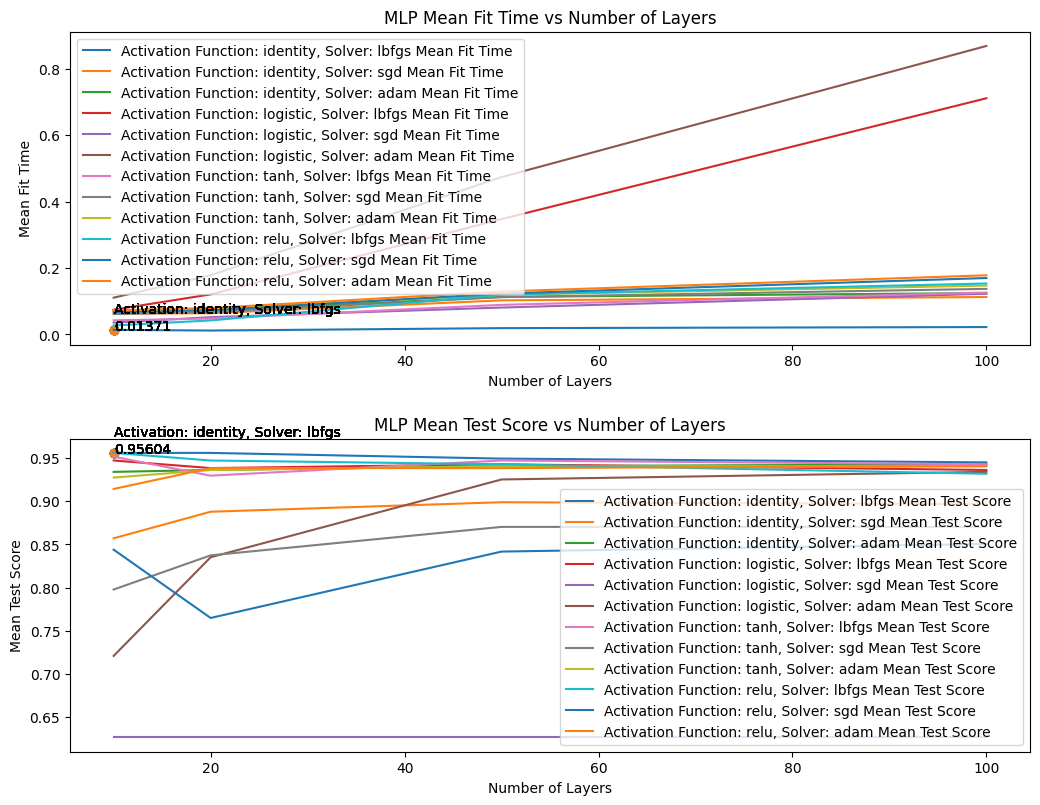

In [18]:
plt.figure(figsize=(12, 9))
activation_functions = mlp_data['param_activation'].unique()
solvers = mlp_data['param_solver'].unique()

for activation in activation_functions:
    for solver in solvers:
        plt.subplot(2, 1, 1)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_fit_time'],
                 label=f'Activation Function: {activation}, Solver: {solver} Mean Fit Time')
        plt.title('MLP Mean Fit Time vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Fit Time')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_fit_time)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_fit_time}',
                     xy=(top_mlp_layer_size, top_mlp_mean_fit_time))
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_test_score'],
                 label=f'Activation Function: {activation}, Solver: {solver} Mean Test Score')
        plt.title('MLP Mean Test Score vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Test Score')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_test_score)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_test_score}',
                     xy=(top_mlp_layer_size, top_mlp_mean_test_score))
        plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/reduced_features_mlp_performance.png')